In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread ("11.jpg")

In [5]:
def CalcOfDamageAndNonDamage (image_name):
    image = cv.imread(image_name)
    
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
    image_erode = cv.erode(image, kernel)

    hsv_img = cv.cvtColor(image_erode, cv.COLOR_BGR2HSV)

    markers = np.zeros((image.shape[0], image.shape[1]), dtype = "int32")
    markers[90:140, 90:140] = 255
    markers[236:255, 0:20] = 1
    markers[0:20, 0:20] = 1
    markers[0:20, 236:255] = 1
    markers[236:255, 236:255] = 1
    leafs_area_BGR = cv.watershed(image_erode, markers)

    healthy_part = cv.inRange(hsv_img, (36, 25, 25), (86, 255, 255))
    ill_part = leafs_area_BGR - healthy_part
    
    mask = np.zeros_like(image, np.uint8)
    mask[leafs_area_BGR > 1] = (255, 0, 255)
    mask[ill_part > 1] = (0, 0, 255)
    return mask

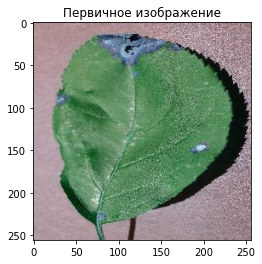

In [6]:
plt.imshow(img)
plt.title("Первичное изображение")
plt.show()

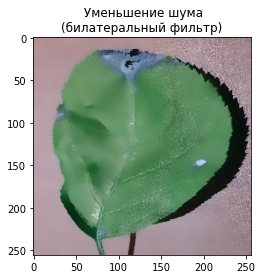

In [9]:
#Билатеральный фильтр
bilateral = cv.bilateralFilter(img, 15, 75, 75)
cv.imwrite("bilateral_filter.png", bilateral)
res_0 = cv.imread ("bilateral_filter.png")
plt.imshow(res_0)
plt.title(" Уменьшение шума\n(билатеральный фильтр)")
plt.show()

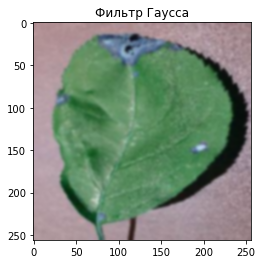

In [22]:
#Фильтр Гаусса
gausfil = cv.GaussianBlur(img, (7, 7), 0)
cv.imwrite("gaus_filter.png", gausfil)
res_2 = cv.imread ("gaus_filter.png")
plt.imshow(res_2)
plt.title("Фильтр Гаусса")
plt.show()

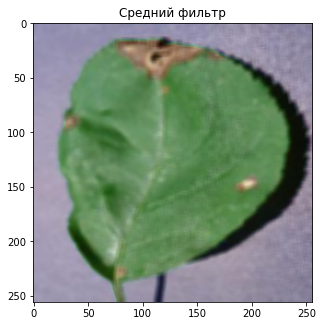

In [57]:
#Средний фильтр

image = cv.imread('11.JPG') # reads the image
image = cv.cvtColor(image, cv.COLOR_BGR2HSV) # convert to HSV
figure_size = 5 # the dimension of the x and y axis of the kernal.
meanf = cv.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(122)
cv.imwrite("mean_filter.png", meanf)
res_3 = cv.imread ("mean_filter.png")
plt.imshow(cv.cvtColor(mean_filter, cv.COLOR_HSV2RGB))
plt.title('Средний фильтр')
plt.show()

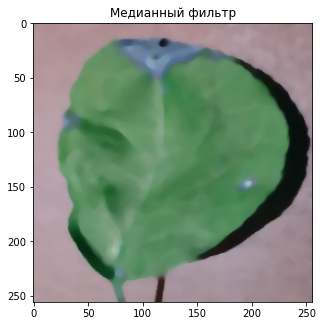

In [84]:
#Медианный фильтр

medianf = cv.medianBlur(image, 5)
plt.figure(figsize=(11,6))
plt.subplot(122), 
cv.imwrite("median_filter.png", medianf)
res_4 = cv.imread ("median_filter.png")
plt.imshow(res_4),
plt.title('Медианный фильтр')
plt.show()

In [99]:
result_1 = CalcOfDamageAndNonDamage("11.jpg")

In [88]:
result_2 = CalcOfDamageAndNonDamage("bilateral_filter.png")

In [23]:
result_3 = CalcOfDamageAndNonDamage("gaus_filter.png")

In [58]:
result_4 = CalcOfDamageAndNonDamage("mean_filter.png")

In [85]:
result_5 = CalcOfDamageAndNonDamage("median_filter.png")

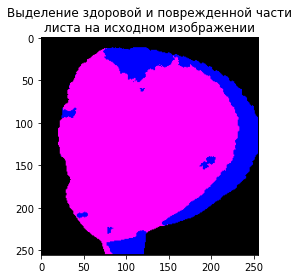

In [100]:
plt.imshow(result_1)
plt.title("Выделение здоровой и поврежденной части\nлиста на исходном изображении")
plt.show()

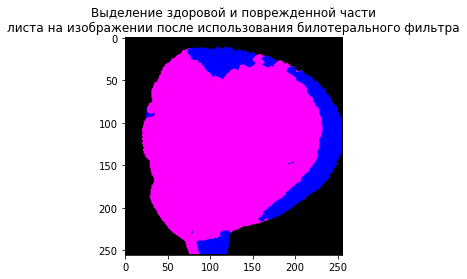

In [89]:
plt.imshow(result_2)
plt.title("Выделение здоровой и поврежденной части\nлиста на изображении после использования билотерального фильтра")
plt.show()

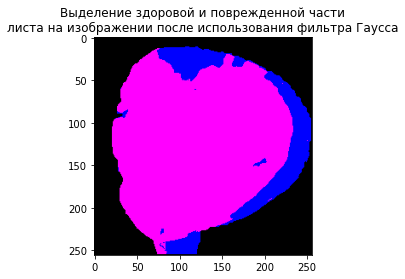

In [24]:
plt.imshow(result_3)
plt.title("Выделение здоровой и поврежденной части\nлиста на изображении после использования фильтра Гаусса")
plt.show()

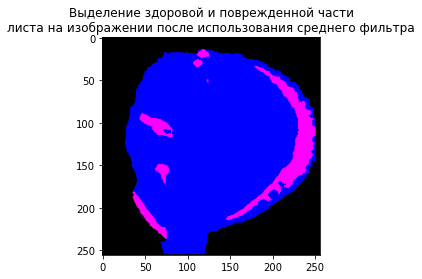

In [59]:
plt.imshow(result_4)
plt.title("Выделение здоровой и поврежденной части\nлиста на изображении после использования среднего фильтра")
plt.show()

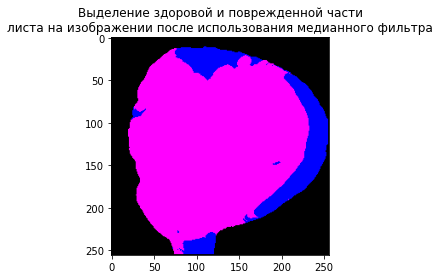

In [86]:
plt.imshow(result_5)
plt.title("Выделение здоровой и поврежденной части\nлиста на изображении после использования медианного фильтра")
plt.show()

Text(0.5, 1.0, 'Медианный фильтр')

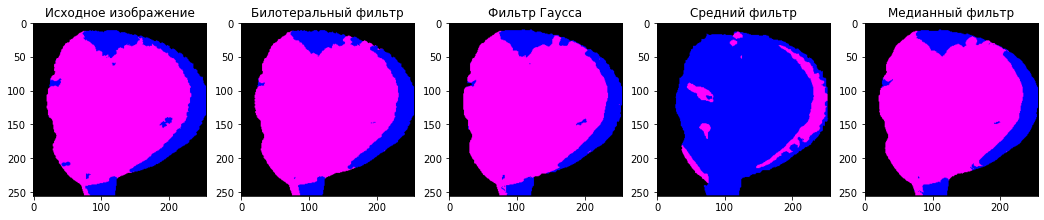

In [104]:
#Все сегментации

plt.figure(figsize=(18, 7))

plt.subplot(1, 5, 1)
plt.imshow(result_1)
plt.title("Исходное изображение")
plt.subplot(1, 5, 2)
plt.imshow(result_2)
plt.title("Билотеральный фильтр")
plt.subplot(1, 5, 3)
plt.imshow(result_3)
plt.title("Фильтр Гаусса")
plt.subplot(1, 5, 4)
plt.imshow(result_4)
plt.title("Средний фильтр")
plt.subplot(1, 5, 5)
plt.imshow(result_5)
plt.title("Медианный фильтр")

Итог
    
Поврежденные участки листа лучше выделять на первичном изображении. 

При выделении повреждений на изображении, где был уменьшен шум с помощью билотерального фильтра будут отображены только сильные повреждения листа, что исказит результаты.

Фильтр Гаусса меньше искажает результаты. Маска, примененная на изображение после использования фильтра Гаусса больше похожа на маску исходного изображения, чем остальные. Но при этом они не являются идентичными.

Средний фильтр не работает для данной ситуации.

В данном случае маска изображения после применения медианного фильтра очень схожа с маской после применения билотерального фильтра. Здесь также сглаживаются мелкие повреждения, что искажает данные.